In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy.optimize import minimize
from sklearn import svm 
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from keras import callbacks
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [3]:
train_data = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/AI_Intern/Seminar1/train_record.csv')
test_data = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/AI_Intern/Seminar1/test_record.csv')

In [4]:
# CONCATENATE train data và test data
print(type(train_data))
X = pd.concat([train_data,test_data])

<class 'pandas.core.frame.DataFrame'>


In [5]:
def normalize_2d(matrix):
    # Only this is changed to use 2-norm put 2 instead of 1
    norm = np.linalg.norm(matrix, 1)
    # normalized matrix
    matrix = matrix/norm  
    return matrix

In [6]:
def remap(inp):
  out = np.zeros((len(inp),2))
  for i in inp:
    out[i] = i
  return out

In [ ]:
data_y = X["DEATH_EVENT"].to_numpy()
data_X = X.drop(["DEATH_EVENT"],axis=1).to_numpy()

In [8]:
scaler = StandardScaler()
scaler.fit(data_X)
data_X = scaler.transform(data_X)

X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.2, random_state=42)

y_train_maped = remap(y_train)

# y_train_scaled=remap(train_data["DEATH_EVENT"].to_numpy())
# X_train_scaled=normalize_2d(train_data.drop(["DEATH_EVENT"],axis=1).to_numpy())
# y_test=test_data["DEATH_EVENT"].to_numpy()
# X_test_scaled=normalize_2d(test_data.drop(["DEATH_EVENT"],axis=1).to_numpy())
# y_train_scaled=remap(train_data["DEATH_EVENT"].to_numpy())
# X_train_scaled=train_data.drop(["DEATH_EVENT"],axis=1).to_numpy()
# y_test=test_data["DEATH_EVENT"].to_numpy()
# X_test_scaled=test_data.drop(["DEATH_EVENT"],axis=1).to_numpy()

In [9]:
X_train.shape, X_test.shape

((239, 12), (60, 12))

In [10]:
display(X_train)

array([[ 1.19294523e+00,  1.14796753e+00, -3.46703786e-01, ...,
         7.35688190e-01, -6.87681906e-01, -1.55206738e+00],
       [-6.59701727e-01,  1.14796753e+00,  1.65728387e-04, ...,
         7.35688190e-01,  1.45416070e+00,  1.01619452e+00],
       [ 1.19294523e+00, -8.71104775e-01, -4.77812204e-01, ...,
         7.35688190e-01, -6.87681906e-01,  1.01619452e+00],
       ...,
       [-9.12335403e-01, -8.71104775e-01, -3.42574387e-01, ...,
         7.35688190e-01,  1.45416070e+00, -1.32425127e-01],
       [-1.67023643e+00, -8.71104775e-01, -4.47874061e-01, ...,
         7.35688190e-01,  1.45416070e+00, -8.03528739e-01],
       [-9.12335403e-01, -8.71104775e-01,  1.30505581e+00, ...,
         7.35688190e-01,  1.45416070e+00, -1.45330966e-01]])

In [11]:
display(train_data)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
244,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
245,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
246,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


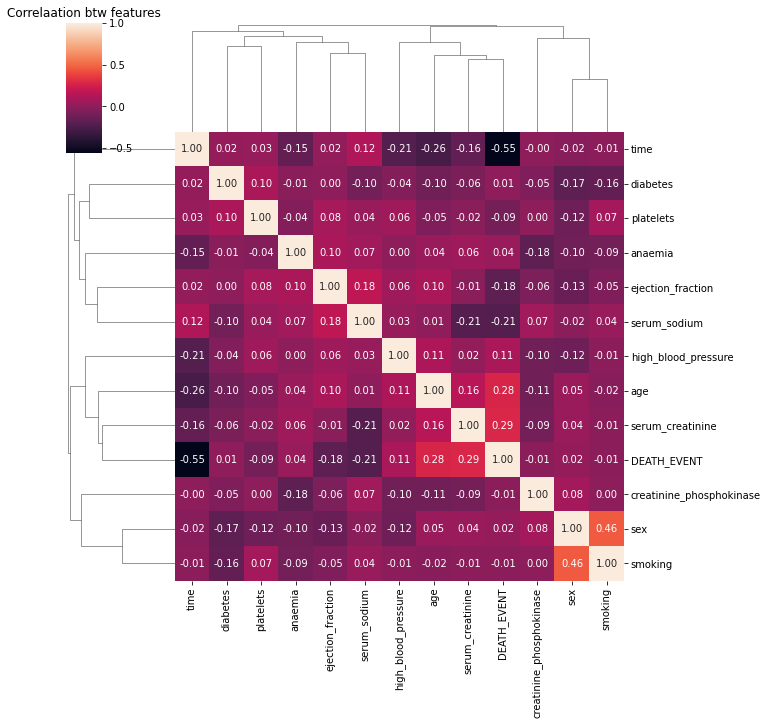

In [12]:
# Tương quan giữa các biến
corr_matrix = train_data.corr()
sns.clustermap(corr_matrix, annot = True, fmt = ".2f")
plt.title("Correlaation btw features")
plt.show()

# Thiết kế mô hình bằng cách tạo các class


In [83]:
class Activation:
  # sigmoid activation
  @staticmethod
  def sigmoid(s):
    return 1 / (1 + np.exp(-s))
  # tanh activation
  @staticmethod
  def relu(s):
    tmp = s>0
    return s*tmp

In [84]:
class ActivationPrime:
  # derivative of sigmoid
  @staticmethod
  def sigmoid_derivative(s):
    return s * (1 - s)

  @staticmethod
  def relu_derivative(s):
    return s>0
 

In [85]:
class Loss:
 # Mean Square Error loss function
 @staticmethod
 def crossEntropy(y_true, y_pred):
   m = len(y_true)
   return -1/m * (y_true*np.log(y_pred) + (1-y_true)*np.log(1-y_pred)).sum()

In [86]:
class LossPrime:
 # derivative of Mean Square Error loss function
 @staticmethod
 def crossEntropy_prime(y_true, y_pred):
  return y_pred - y_true


In [87]:
# abstract layer class
class BaseLayer:
  def __init__(self):
    pass
  def forward(self, in_data):
    pass
  def backward(self, out_error, rate):
    pass


In [88]:
class ActivationLayer(BaseLayer):
  def __init__(self, activation, activation_derivative):
    self.in_data = None
    self.out_data = None
    self.activation = activation
    self.activation_derivative = activation_derivative
  def forward(self, in_data):
    self.in_data = in_data.copy()
    self.out_data = self.activation(in_data)
    return self.out_data
  def backward(self, out_error, rate):
    return self.activation_derivative(out_error) 

In [89]:
class FCLayer(BaseLayer):
  def __init__(self, in_size, out_size):
    self.in_data = None
    self.out_data = None
    self.weights = np.random.rand(in_size, out_size)
  def forward(self, in_data):
    self.in_data = in_data.copy()
    self.out_data = self.in_data@self.weights
    return self.out_data
  def backward(self, out_error, rate):
    e = out_error@self.weights.T
    self.weights = self.weights - rate*(out_error.T@self.in_data).T
    return e


In [90]:
class Network:
  def __init__(self, loss, lossprime):
    self.layers = []
    self.loss = loss
    self.loss_prime = lossprime

  def addLayer(self, layer):
    self.layers.append(layer)
 
  def fit(self, x_train, y_train, epochs, alpha):
    for i in range (epochs):
      #forward propagation
      output = x_train.copy()
      for layer in self.layers:
        output = layer.forward(output)
      if (i+1)%500 != 0:
        error = self.loss(y_train,output)
        print (f"loss in eporch {i+1} = ", error)
      #back propagation
      gradient = self.loss_prime(y_train, output)
      for layer in reversed(self.layers[:-1]):
        gradient = layer.backward(gradient,alpha)

  def predict(self, data):
    result = data
    for i in self.layers:
      result = i.forward(result)
    return result






### Train và test


In [91]:
# input: 12
# weight1: (12x8)
# lớp ẩn 1 có 8 node, activation: Relu
# weight2: (8x2)
# lớp output: activation: Sigmoid

nn = Network(Loss.crossEntropy, LossPrime.crossEntropy_prime) 
nn.addLayer(FCLayer(12,10)) 
nn.addLayer(ActivationLayer(Activation.relu,ActivationPrime.relu_derivative))
nn.addLayer(FCLayer(10,2))
# nn.addLayer(ActivationLayer(Activation.relu,ActivationPrime.relu_derivative))
# nn.addLayer(FCLayer(8,2))
nn.addLayer(ActivationLayer(Activation.sigmoid,ActivationPrime.sigmoid_derivative))


In [ ]:
nn.fit(alpha=0.1,x_train=X_train, y_train = y_train_maped,epochs = 2000)

In [93]:
predictions = nn.predict(X_test)
accuracy = np.mean(np.argmax(predictions, axis = 1) == y_test) * 100
accuracy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


65.0